<a href="https://colab.research.google.com/github/jcromeroru/Segunda-Entrega-Instrumentos-Opticos/blob/main/Entrega_2_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos las librerías, definimos las unidades y tamaño de píxel

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

#definimos nuestras unidades
um = 1e-6
mm = 1e-3
nm= 1e-9

N = 2048
M = 2048
w_length = 650*nm #definimos la longitud de onda
dx=dy=1*um #definimos el tamaño de pixel con condiciones de mundo 

# ***Definimos las máscaras a usar***

In [ ]:
#definimos las máscaras a usar

In [2]:
'''Debemos definir dimensiones de mundo para poder escalar de manera física las aberturas y obstáculos'''
M_mask = 255
N_mask = 255
#definimos el espacio coordenado
x=np.arange(-int(M_mask/2),int(M_mask/2),1)
y=np.arange(-int(N_mask/2),int(N_mask/2),1)
X,Y =np.meshgrid(x,y)
#damos dimensiones de mundo
X = X*dx
Y = Y*dy

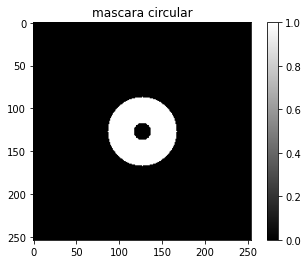

In [38]:
r_1 = 10*um
r_a = 40*um
#Presentamos las máscaras como areglos que permitan dimensiones reales iguales que las máscaras anteriores (en forma)

mask_circ_1 = np.array(X**2+Y**2 >= r_1**2, dtype=bool)#obstáculo central
mask_circ_2 = np.array(X**2+Y**2 <= r_a**2, dtype=bool)#rendija circular pasante
mask_dona = mask_circ_1*mask_circ_2

plt.figure()
plt.title("mascara circular")
plt.imshow(mask_dona,cmap='gray')
plt.colorbar()
plt.show()

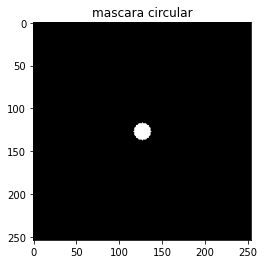

In [32]:
r_1 = 10*um
r_a = 40*um
#Presentamos las máscaras como areglos que permitan dimensiones reales iguales que las máscaras anteriores (en forma)

mask_circ_1 = np.array(X**2+Y**2 <= r_1**2, dtype=bool)#pinhole
mask_circ_2 = np.array(X**2+Y**2 <= r_a**2, dtype=bool)#rendija circular pasante
mask_dona = mask_circ_1*mask_circ_2

plt.figure()
plt.title("mascara circular")
plt.imshow(mask_circ_1,cmap='gray')
plt.show()

# **Punto 1**
Difracción escalar de transformada de fresnel y espectro ángular (FFT y DFT)

# **FFT**

Espectro angular

In [5]:
#Definimos la función de transmitancia para espectro angular
def T_AproxEA(T_f,dx_f,dy_f,z_f,wave_length):
  '''
  sea T_f: la transmirancia que le voya  ingresar, equivalente al U_0
  '''
  #tomamos el contenido freq de la imagen
  T_freq=np.fft.fftshift(np.fft.fft2(T_f))

  #definimos el espacio coordenado
  N_f, M_f = np.shape(T_f)
  
  x=np.arange(-int(M_f/2),int(M_f/2),1)
  y=np.arange(-int(N_f/2),int(N_f/2),1)
  X,Y= np.meshgrid(x,y)

  #damos dimensiones de mundo
 
  fx=X*(1/(M_f*dx_f))*wave_length
  fy=Y*(1/(N_f*dy_f))*wave_length

  k=2*np.pi/wave_length

  C1 = (1j*k*z_f)#/(1j*wave_Length*z_f)
  C2 = -1j*np.pi*wave_length*z_f

  
  mat = np.exp(C1*(1-(fx**2)-(fy**2))**1/2)
  freq_p = T_freq*mat
  return freq_p

Fresnel

In [ ]:
def ft2(data, delta):
   
    DATA = numpy.fft.fftshift(
            numpy.fft.fft2(
                    numpy.fft.fftshift(data, axes=(-1,-2))
                    ), axes=(-1,-2)
            )*delta**2

    return DATA

In [ ]:
def TFresnel(Uin, wvl, d1, z):
    """
    Propagación de Fresnel usando el método de Transformada de Fresnel
    Devuelve amplitud compleja tras la propagacion

    """
    N = Uin.shape[0]    #Se asume que es cuadrado
    k = 2*np.pi/wvl  #vector de onda optico

    #Coordenadas en el plano de entrada
    x1,y1 = np.meshgrid( np.arange(-N/2.,N/2.) * d1,
                            np.arange(-N/2.,N/2.) * d1)
    #Coordenadas del plano de observación
    d2 = wvl*z/(N*d1)
    x2,y2 = np.meshgrid( np.arange(-N/2.,N/2.) * d2,
                            np.arange(-N/2.,N/2.) * d2 )

    #Evaluación de la integral
    A = 1/(1j*wvl*z)
    B = np.exp( 1j * k/(2*z) * (x2**2 + y2**2))
    C = ft2(Uin *np.exp(1j * k/(2*z) * (x1**2+y1**2)), d1)

    Uout = A*B*C*np.exp(1j*k*z)

    return Uout

# **DFT**

# **Punto 2**

 ***Literal a***

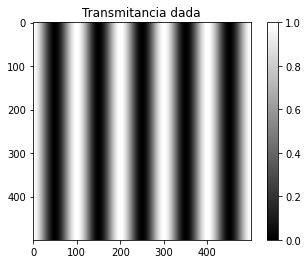

In [23]:
### Máscara del punto 2a.


def transc(m, L,size):
    """
    Parametros:
        m
        L
        size (int)           : tamaño del array 2-D que contiene a la transmitancia

    Retorna:
        C (float64) : el arreglo de la transmitancia
    """
    # (1) Genera el arreglo de salida:
    C = np.zeros((size, size))

    coords = np.arange(0, size, 1)
   

    # (2) Genera las coordenadas 2-D de los centros de pixel:
    x, y = np.meshgrid(coords, coords)


    # (3) Calcula la salida:
   
    C[y,x] = 0.5*(1+m*np.cos(2*np.pi*x/L))

    return C


mask3=transc(1,100,500)

plt.figure()
plt.title("Transmitancia dada")
plt.imshow(mask3,cmap='gray')
plt.colorbar()
plt.show()

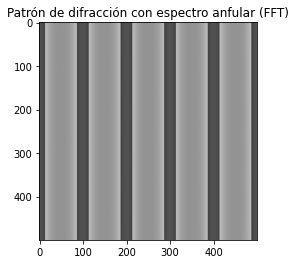

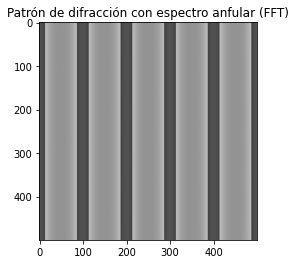

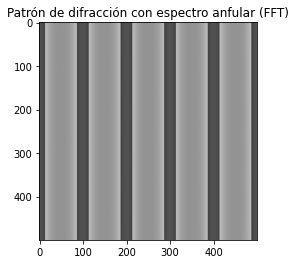

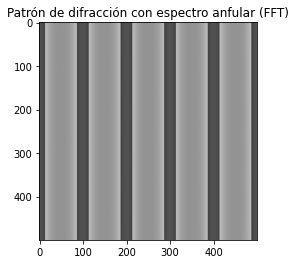

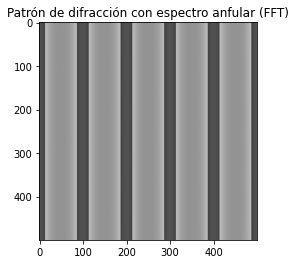

In [41]:
N = [2,4,6,8,10]  
for z in N:
  z = 8*(100**2)/w_length

  f_prop1 = T_AproxEA(mask3,dx,dy,z,w_length)

  difr_prop_ph = np.fft.ifft2(f_prop1)

  plt.figure()
  plt.title("Patrón de difracción con espectro anfular (FFT)")
  #plt.imshow(np.abs(difr_prop_ph),cmap='gray')
  plt.imshow(np.angle(difr_prop_ph),cmap='gray')

***Literal B Principio de Babinet***

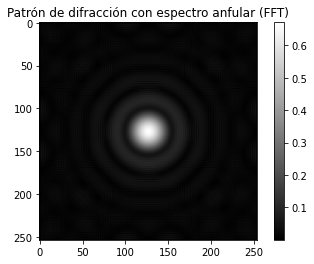

In [37]:
z2 = 0.7*mm
f_prop1 = T_AproxEA(mask_circ_1,dx,dy,z2,w_length)

difr_prop_ph = np.fft.ifft2(f_prop1)

plt.figure()
plt.title("Patrón de difracción con espectro anfular (FFT)")
plt.imshow(np.abs(difr_prop_ph),cmap='gray')

plt.colorbar()
plt.show()

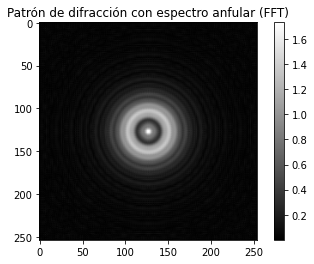

In [39]:
z3 = 0.7*mm
f_prop_ob = T_AproxEA(mask_dona,dx,dy,z3,w_length)

difr_prop_ob = np.fft.ifft2(f_prop_ob)

plt.figure()
plt.title("Patrón de difracción con espectro anfular (FFT)")
plt.imshow(np.abs(difr_prop_ob),cmap='gray')

plt.colorbar()
plt.show()

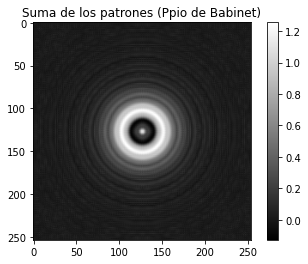

In [40]:
plt.figure()
plt.title("Suma de los patrones (Ppio de Babinet)")
plt.imshow(np.abs(difr_prop_ob)-np.abs(difr_prop_ph),cmap='gray')
plt.colorbar()
plt.show()